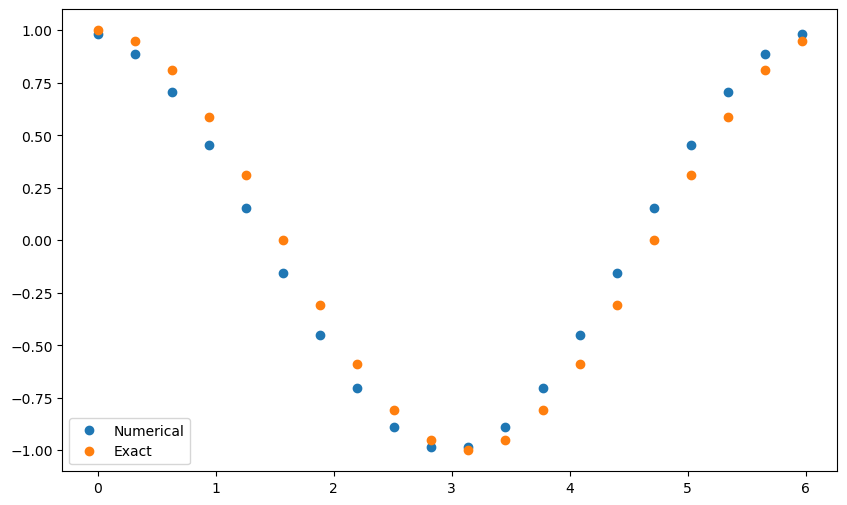

In [29]:
# a

import numpy as np
def f_x(x):
    return np.sin(x)

def f_x_derived(x,dx):
    return (f_x(x+dx) - f_x(x))/dx

N = np.linspace(0, 2*np.pi, 20,endpoint=False)
dx = (2*np.pi)/len(N)


true_derived_f_x = np.cos(N)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(N,f_x_derived(N,dx),'o', label="Numerical")
plt.plot(N,true_derived_f_x,'o', label="Exact")

plt.legend()
plt.show()

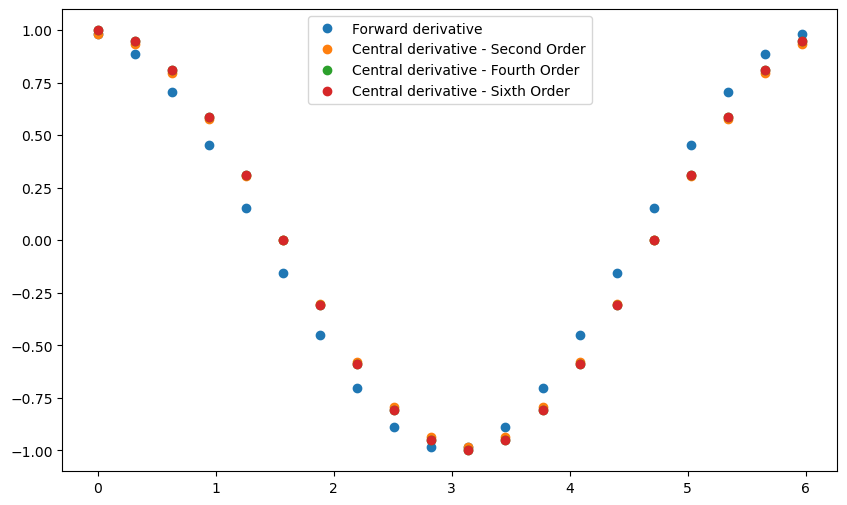

In [30]:

# b

def forward_derivative(x,dx):
    return (f_x(x + dx) - f_x(x)) / dx

def central_derivative_second_order(x, dx):
    return (f_x(x+dx)-f_x(x-dx))/(2*dx)

def central_derivative_fourth_order(x, dx):
    return (1/12*f_x(x-2*dx) - 2/3*f_x(x-dx) + 2/3*f_x(x+dx) -1/12*f_x(x+2*dx))/dx

def central_derivative_sixth_order(x, dx):
    return (-1/60*f_x(x-3*dx) + 3/20*f_x(x-2*dx) - 3/4*f_x(x-dx) + 3/4*f_x(x+dx) - 3/20*f_x(x+2*dx) + 1/60*f_x(x+3*dx))/dx


plt.figure(figsize=(10, 6))


plt.plot(N,forward_derivative(N,dx),'o', label="Forward derivative")
plt.plot(N,central_derivative_second_order(N,dx),'o', label="Central derivative - Second Order")
plt.plot(N,central_derivative_fourth_order(N,dx),'o', label="Central derivative - Fourth Order")
plt.plot(N,central_derivative_sixth_order(N,dx),'o', label="Central derivative - Sixth Order")


plt.legend()
plt.show()

In [31]:
# c

error_forward_derivative = np.max(abs(forward_derivative(N,dx)-true_derived_f_x))
error_central_derivative_1 = np.max(abs(central_derivative_second_order(N,dx)-true_derived_f_x))
error_central_derivative_2 = np.max(abs(central_derivative_fourth_order(N,dx)-true_derived_f_x))
error_central_derivative_3 = np.max(abs(central_derivative_sixth_order(N,dx)-true_derived_f_x))
print("Forward Derivative: ", error_forward_derivative)
print("Central derivative - Second Order: ", error_central_derivative_1)
print("Central derivative - Fourth Order: ", error_central_derivative_2)
print("Central derivative - Sixth Order: ", error_central_derivative_3)

# The maximum absolute error is smallest using the Sixth Order Central Derivative.

Forward Derivative:  0.15579194727527879
Central derivative - Second Order:  0.016368356916534044
Central derivative - Fourth Order:  0.0003209038182585555
Central derivative - Sixth Order:  6.736514570615526e-06


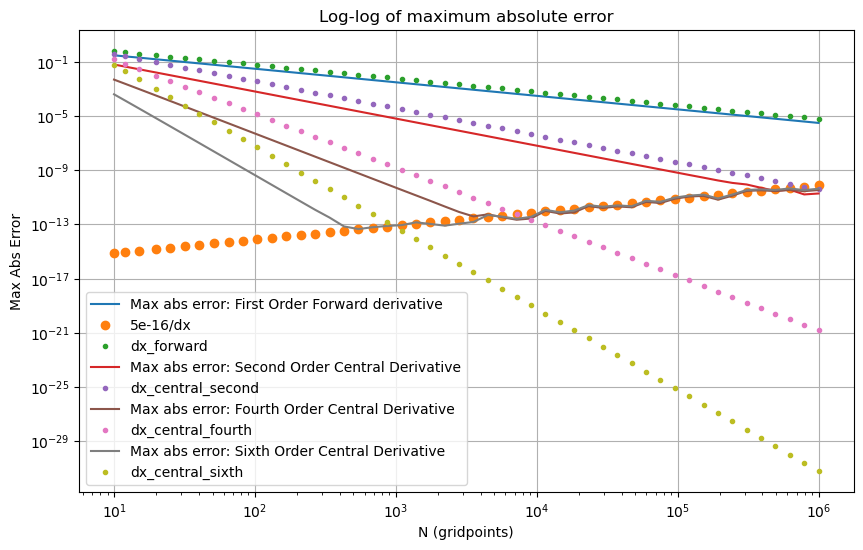

In [32]:
# d

N = np.logspace(1, 6, 50, dtype=int)
dx_array = np.zeros(len(N))

def error_forward_derivative_for_large_n():
    array = np.zeros(len(N))
    for i, n in enumerate(N):
        x = np.linspace(0, 2*np.pi, n, endpoint=False)
        true_derived_f_x = np.cos(x)
        dx = x[1]-x[0]
        dx_array[i] = dx
        error = np.max(abs(forward_derivative(x,dx)-true_derived_f_x))
        array[i] = error
    return array

def error_central_derivative_for_large_n_1():
    array = np.zeros(len(N))
    for i, n in enumerate(N):
        x = np.linspace(0, 2*np.pi, n, endpoint=False)
        true_derived_f_x = np.cos(x)
        dx = x[1]-x[0]
        dx_array[i] = dx**2
        error = np.max(abs(central_derivative_second_order(x,dx)-true_derived_f_x))
        array[i] = error
    return array

def error_central_derivative_for_large_n_2():
    array = np.zeros(len(N))
    for i, n in enumerate(N):
        x = np.linspace(0, 2*np.pi, n, endpoint=False)
        true_derived_f_x = np.cos(x)
        dx = x[1]-x[0]
        dx_array[i] = dx**4
        error = np.max(abs(central_derivative_fourth_order(x,dx)-true_derived_f_x))
        array[i] = error
    return array

def error_central_derivative_for_large_n_3():
    array = np.zeros(len(N))
    for i, n in enumerate(N):
        x = np.linspace(0, 2*np.pi, n, endpoint=False)
        true_derived_f_x = np.cos(x)
        dx = x[1]-x[0]
        dx_array[i] = dx**6
        error = np.max(abs(central_derivative_sixth_order(x,dx)-true_derived_f_x))
        array[i] = error
    return array

plt.figure(figsize=(10, 6))

#TODO: fix farver
plt.plot(N,error_forward_derivative_for_large_n(), label="Max abs error: First Order Forward derivative")
plt.plot(N,5e-16/dx_array,'o', label="5e-16/dx")

plt.plot(N,dx_array,'.', label="dx_forward")
plt.plot(N,error_central_derivative_for_large_n_1(), label="Max abs error: Second Order Central Derivative")

plt.plot(N,dx_array,'.', label="dx_central_second")
plt.plot(N,error_central_derivative_for_large_n_2(), label="Max abs error: Fourth Order Central Derivative")

plt.plot(N,dx_array,'.', label="dx_central_fourth")
plt.plot(N,error_central_derivative_for_large_n_3(), label="Max abs error: Sixth Order Central Derivative")

plt.plot(N,dx_array,'.', label="dx_central_sixth")


plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.xlabel('N (gridpoints)')
plt.ylabel("Max Abs Error")
plt.title("Log-log of maximum absolute error")
plt.grid(True)
plt.show()
# The Sixth Order Central Derivative has the least max abs errors. At some point the graphs meet and follow each other,
# which is because of the machine error/rounding error. 


In [33]:
# e 
# Best accuracy for second order is ca. 10e-10
# Best accuracy for sixth order is almost 10e-13
# A quick prediction could be that the first order's best accuracy will be 10e-8,
# as it will be limited by the rounding errors as the other orders.

In [34]:
# f
# 10^2 = 100
# fourth order method with n = 100 is approximately 10e-6
# to obtian 10e-6 with second order, we need n (grid points) = 10^4 = 10.000


In [35]:
# g
# 5e-16 can be seen following the trend of rounding errors, as this is in fact the limit of how precisely a computer can compute. (Machine Epsilon)
# The curves of dx^n, where n is the order of the method, have the same slope as the function of their designated order.